In [1]:
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

## Read data

In [2]:
PATH_CSV_DIR = '/home/juravlik/PycharmProjects/ssu_artworks/static/data/csv/'

In [3]:
df_train = pd.read_csv(os.path.join(PATH_CSV_DIR, 'train.csv'),
                       sep=';')

df_test = pd.read_csv(os.path.join(PATH_CSV_DIR, 'test.csv'),
                       sep=';')

df_valid = pd.read_csv(os.path.join(PATH_CSV_DIR, 'valid.csv'),
                       sep=';')

df_index = pd.read_csv(os.path.join(PATH_CSV_DIR, 'index.csv'),
                       sep=';')

In [4]:
df_all = pd.concat([df_train, df_test, df_index, df_valid], ignore_index=True)

In [6]:
df_all = df_all.drop_duplicates(subset=['imgId', 'style', 'author', 'class'])

In [7]:
def str_to_age(x: str) -> int:
    
    x = re.sub(r"\(\d+\)", "", x)

    last_s = x.split('-')[-1]
    
    last_s = int(last_s) if len(last_s) == 4 and last_s.isdigit() and int(last_s) <= 2022 and last_s[0] != 0 else 0
    
    return last_s


In [8]:
df_all['age'] = df_all['imgId'].apply(lambda x: str_to_age(x))

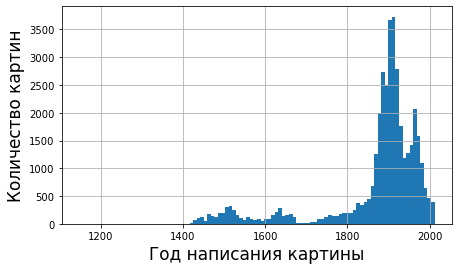

In [14]:
# sns.set(font_scale=1.3)
plt.figure(figsize=(7, 4))

df_all[df_all.age > 0].age.hist(bins=100)
plt.xlabel('Год написания картины', fontsize=17);
plt.ylabel('Количество картин', fontsize=17);
plt.title('', fontsize=17)
plt.show()

In [15]:
df_all_age = df_all[df_all.age > 0]

In [23]:
df_age_min = df_all_age.groupby('author')['age'].min().reset_index().rename(columns={'age': 'age_min'})
df_age_max = df_all_age.groupby('author')['age'].max().reset_index().rename(columns={'age': 'age_max'})

df_all_age = df_all_age.merge(df_age_min, how='left', on=['author'])
df_all_age = df_all_age.merge(df_age_max, how='left', on=['author'])

df_all_age['age_diff'] = df_all_age['age_max'] - df_all_age['age_min']

In [34]:
df_all_age = df_all_age.groupby(['author']).first()

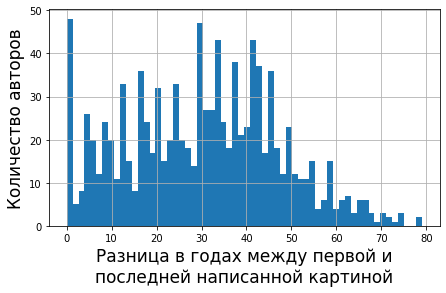

In [38]:
plt.figure(figsize=(7, 4))

df_all_age[df_all_age.age_diff < 80]['age_diff'].hist(bins=60)
plt.xlabel('Разница в годах между первой и\nпоследней написанной картиной', fontsize=17);
plt.ylabel('Количество авторов', fontsize=17);
plt.title('', fontsize=17)
plt.show()

In [50]:
df_all['style'].value_counts()

Realism                       5162
Impressionism                 4216
Expressionism                 3818
Post_Impressionism            3256
Romanticism                   3027
Art_Nouveau_Modern            2088
Abstract_Expressionism        2082
Symbolism                     1948
Baroque                       1603
Cubism                        1575
Color_Field_Painting          1321
Minimalism                    1132
Naive_Art_Primitivism         1040
Pop_Art                       1005
Rococo                         952
Northern_Renaissance           875
High_Renaissance               692
Early_Renaissance              664
Fauvism                        653
Mannerism_Late_Renaissance     615
Pointillism                    321
Contemporary_Realism           207
Synthetic_Cubism               177
New_Realism                    156
Ukiyo_e                        155
Analytical_Cubism               98
Action_painting                 69
Name: style, dtype: int64

In [66]:
df_all[df_all.age >= 2020]['imgId'].tolist()

[]

In [67]:
df_all.loc[(df_all.age <= 1377), 'age'] = 0

In [68]:
df_all = df_all[df_all.age > 0]
df_all.shape[0]

38903

In [49]:
df_all.groupby(['style'])['age'].mean()

style
Abstract_Expressionism        1970.337176
Action_painting               1955.333333
Analytical_Cubism             1910.806122
Art_Nouveau_Modern            1908.165230
Baroque                       1649.618840
Color_Field_Painting          1972.227858
Contemporary_Realism          1979.082126
Cubism                        1929.098413
Early_Renaissance             1462.939759
Expressionism                 1932.124673
Fauvism                       1930.679939
High_Renaissance              1511.767341
Impressionism                 1900.305740
Mannerism_Late_Renaissance    1559.546341
Minimalism                    1977.212014
Naive_Art_Primitivism         1944.616346
New_Realism                   1925.019231
Northern_Renaissance          1502.787429
Pointillism                   1897.785047
Pop_Art                       1976.257711
Post_Impressionism            1914.838452
Realism                       1887.781093
Rococo                        1765.713235
Romanticism                 

In [48]:
df_all = df_all[df_all.age > 0]

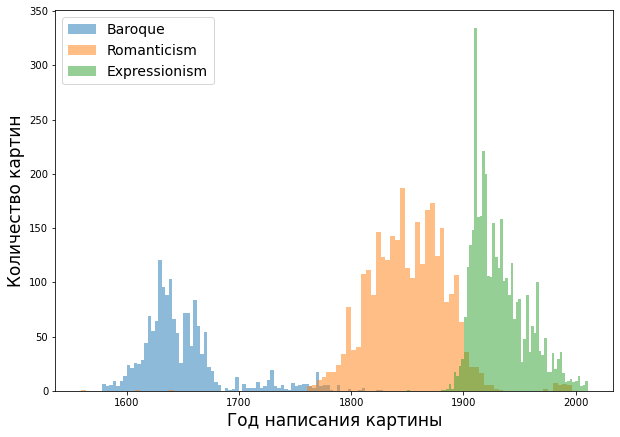

In [63]:
plt.figure(figsize=(10, 7))

# plt.hist(df_all[df_all['style'] == 'Impressionism']['age'], bins=100, alpha=0.5, label="Impressionism")
plt.hist(df_all[df_all['style'] == 'Baroque']['age'], bins=80, alpha=0.5, label="Baroque")
plt.hist(df_all[df_all['style'] == 'Romanticism']['age'], bins=100, alpha=0.5, label="Romanticism")
plt.hist(df_all[df_all['style'] == 'Expressionism']['age'], bins=70, alpha=0.5, label="Expressionism")

plt.legend(loc='upper left', fontsize=14);
plt.xlabel('Год написания картины', fontsize=17);
plt.ylabel('Количество картин', fontsize=17);
plt.title('', fontsize=17)
plt.show()

In [74]:
df_test[df_test['style'] == 'Romanticism'].imgId.values

array(['Romanticism__thomas-cole_self-portrait-1836',
       'Romanticism__rudolf-von-alt_the-st-nicholas-church-in-gastein-1897',
       'Romanticism__ivan-aivazovsky_before-battle-ship-constantinople-1872',
       'Romanticism__gustave-moreau_the-daughters-of-thespius-1853',
       'Romanticism__jan-matejko_augustus-iii',
       'Romanticism__joseph-wright_arkwright-s-cotton-mills-by-night',
       'Romanticism__thomas-cole_autumn-landscape-mount-chocorua-1828'],
      dtype=object)

In [ ]:
Early_Renaissance__fra-angelico_sacred-conversation-1443
Abstract_Expressionism__sam-francis_untitled-sfe-071-1989
Romanticism__ivan-aivazovsky_before-battle-ship-constantinople-1872


In [70]:
df_all.groupby(['style'])['age'].median()

style
Abstract_Expressionism        1967
Action_painting               1954
Analytical_Cubism             1911
Art_Nouveau_Modern            1908
Baroque                       1640
Color_Field_Painting          1969
Contemporary_Realism          1976
Cubism                        1922
Early_Renaissance             1465
Expressionism                 1927
Fauvism                       1914
High_Renaissance              1510
Impressionism                 1899
Mannerism_Late_Renaissance    1561
Minimalism                    1973
Naive_Art_Primitivism         1945
New_Realism                   1915
Northern_Renaissance          1511
Pointillism                   1894
Pop_Art                       1973
Post_Impressionism            1910
Realism                       1884
Rococo                        1767
Romanticism                   1851
Symbolism                     1907
Synthetic_Cubism              1914
Ukiyo_e                       1831
Name: age, dtype: int64

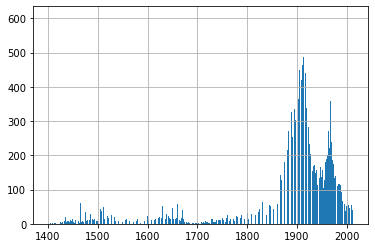

In [71]:
df_all.age.hist(bins=1000)

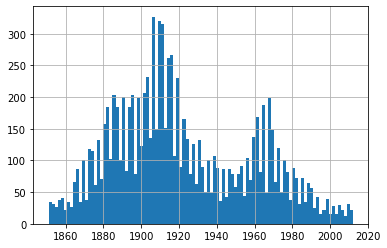

In [72]:
df_all[df_all.age > 1850].sample(10000, random_state=42).age.hist(bins=100)

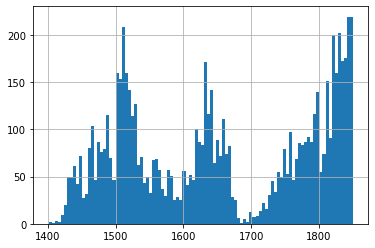

In [73]:
df_all[df_all.age <= 1850].age.hist(bins=100)

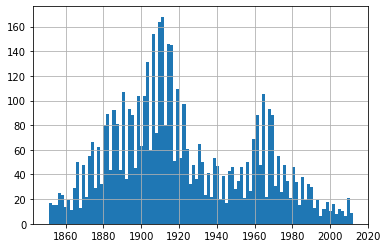

In [74]:
df_all[df_all.age > 1850].sample(5000, random_state=42).age.hist(bins=100)

In [77]:
df_all = pd.concat([df_all[df_all.age <= 1850],
                    df_all[df_all.age > 1850].sample(4000, random_state=42)], ignore_index=True)

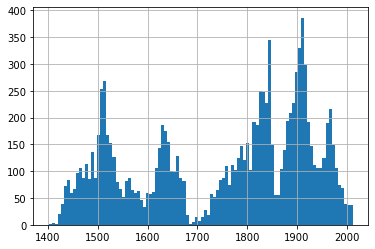

In [88]:
df_all.age.hist(bins=100)

In [89]:
df_train, df_test = train_test_split(df_all, test_size=0.05, stratify=df_all['style'], random_state=42)
df_train, df_valid = train_test_split(df_train, test_size=0.2, stratify=df_train['style'], random_state=42)

In [90]:
df_train

,imgId,style,author,class,age
3224,Mannerism_Late_Renaissance__correggio_madonna-...,Mannerism_Late_Renaissance,Correggio,Mannerism_Late_Renaissance__correggio,1530
5568,High_Renaissance__lorenzo-lotto_altar-of-recan...,High_Renaissance,Lorenzo Lotto,High_Renaissance__lorenzo-lotto,1508
6175,Romanticism__francisco-goya_blind-man-s-buff-1789,Romanticism,Francisco Goya,Romanticism__francisco-goya,1789
8136,Cubism__henri-laurens_le-grand-adieu-1941,Cubism,Henri Laurens,Cubism__henri-laurens,1941
5219,High_Renaissance__correggio_madonna-and-child-...,High_Renaissance,Correggio,High_Renaissance__correggio,1514
...,...,...,...,...,...
6194,Romanticism__francisco-goya_the-adoration-of-t...,Romanticism,Francisco Goya,Romanticism__francisco-goya,1772
6045,Realism__camille-corot_venice-view-of-the-escl...,Realism,Camille Corot,Realism__camille-corot,1834
691,Baroque__diego-velazquez_adoration-of-the-king...,Baroque,Diego Velazquez,Baroque__diego-velazquez,1619
10503,Realism__ilya-mashkov_watermelon-and-grapes-1920,Realism,Ilya Mashkov,Realism__ilya-mashkov,1920


In [91]:
df_test

,imgId,style,author,class,age
2978,Romanticism__johan-christian-dahl_copenhagen-h...,Romanticism,Johan Christian Dahl,Romanticism__johan-christian-dahl,1846
5796,Baroque__rembrandt_the-three-cottages-1650,Baroque,Rembrandt,Baroque__rembrandt,1650
9165,Impressionism__leon-dabo_a-study-of-talloires-...,Impressionism,Leon Dabo,Impressionism__leon-dabo,1939
3227,Mannerism_Late_Renaissance__agnolo-bronzino_th...,Mannerism_Late_Renaissance,Agnolo Bronzino,Mannerism_Late_Renaissance__agnolo-bronzino,1556
2646,Romanticism__francesco-hayez_melancholic-thoug...,Romanticism,Francesco Hayez,Romanticism__francesco-hayez,1842
...,...,...,...,...,...
11089,Realism__viktor-vasnetsov_portrait-of-natalia-...,Realism,Viktor Vasnetsov,Realism__viktor-vasnetsov,1883
108,Baroque__jacob-jordaens_satyr-and-peasant-1621,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1621
9138,Abstract_Expressionism__audrey-flack_abstract-...,Abstract_Expressionism,Audrey Flack,Abstract_Expressionism__audrey-flack,1952
6071,Realism__gustave-courbet_portrait-of-alphonse-...,Realism,Gustave Courbet,Realism__gustave-courbet,1847


In [92]:
df_valid

,imgId,style,author,class,age
3941,Rococo__vieira-portuense_leda-e-o-cisne-1798,Rococo,Vieira Portuense,Rococo__vieira-portuense,1798
9861,Realism__vincent-van-gogh_parsonage-garden-in-...,Realism,Vincent Van Gogh,Realism__vincent-van-gogh,1885
3711,Rococo__thomas-gainsborough_mrs-grace-d-elliot...,Rococo,Thomas Gainsborough,Rococo__thomas-gainsborough,1778
8951,Expressionism__pablo-picasso_big-heads-1969,Expressionism,Pablo Picasso,Expressionism__pablo-picasso,1969
7028,Romanticism__francisco-goya_as-far-back-as-his...,Romanticism,Francisco Goya,Romanticism__francisco-goya,1799
...,...,...,...,...,...
5703,High_Renaissance__michelangelo_st-peter-1504,High_Renaissance,Michelangelo,High_Renaissance__michelangelo,1504
796,Baroque__bartolome-esteban-murillo_joseph-with...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo,1666
905,Baroque__esaias-van-de-velde_a-frozen-river-wi...,Baroque,Esaias Van De Velde,Baroque__esaias-van-de-velde,1619
2584,Romanticism__john-constable_flatford-mill-from...,Romanticism,John Constable,Romanticism__john-constable,1811


In [93]:
df_train.to_csv(os.path.join(PATH_CSV_DIR, 'downsampling_age_train.csv'), sep=';', index=False)
df_valid.to_csv(os.path.join(PATH_CSV_DIR, 'downsampling_age_valid.csv'), sep=';', index=False)
df_test.to_csv(os.path.join(PATH_CSV_DIR, 'downsampling_age_test.csv'), sep=';', index=False)

In [3]:
df_train = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_train.csv'), sep=';')
df_valid = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_valid.csv'), sep=';')
df_test = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_test.csv'), sep=';')


In [5]:
df_train.age.min(), df_train.age.max(),

(1405, 2012)

In [6]:
df_valid.age.min(), df_valid.age.max(),

(1409, 2012)

In [7]:
df_test.age.min(), df_test.age.max()

(1401, 2011)

## Add "age" to index.csv

In [4]:
df_index

,imgId,style,author,class
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
2,Baroque__bartolome-esteban-murillo_st-isidore-...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo
3,Baroque__frans-snyders_a-fruit-stall-1,Baroque,Frans Snyders,Baroque__frans-snyders
4,Baroque__david-teniers-the-younger_a-smoker-le...,Baroque,David Teniers The Younger,Baroque__david-teniers-the-younger
...,...,...,...,...
69331,Baroque__alonzo-cano_noli-me-tangere,Baroque,Alonzo Cano,Baroque__alonzo-cano
69332,Color_Field_Painting__frank-stella_sinjerli-va...,Color_Field_Painting,Frank Stella,Color_Field_Painting__frank-stella
69333,Realism__camille-corot_the-bay-of-somme,Realism,Camille Corot,Realism__camille-corot
69334,Early_Renaissance__masaccio_portrait-of-a-youn...,Early_Renaissance,Masaccio,Early_Renaissance__masaccio


In [6]:
df_index['age'] = df_index['imgId'].apply(lambda x: str_to_age(x))

In [8]:
df_index.loc[df_index.age == 0, 'age'] = None

In [11]:
df_index

,imgId,style,author,class,age
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1617.0
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1621.0
2,Baroque__bartolome-esteban-murillo_st-isidore-...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo,1655.0
3,Baroque__frans-snyders_a-fruit-stall-1,Baroque,Frans Snyders,Baroque__frans-snyders,NaN
4,Baroque__david-teniers-the-younger_a-smoker-le...,Baroque,David Teniers The Younger,Baroque__david-teniers-the-younger,1643.0
...,...,...,...,...,...
69331,Baroque__alonzo-cano_noli-me-tangere,Baroque,Alonzo Cano,Baroque__alonzo-cano,NaN
69332,Color_Field_Painting__frank-stella_sinjerli-va...,Color_Field_Painting,Frank Stella,Color_Field_Painting__frank-stella,1977.0
69333,Realism__camille-corot_the-bay-of-somme,Realism,Camille Corot,Realism__camille-corot,NaN
69334,Early_Renaissance__masaccio_portrait-of-a-youn...,Early_Renaissance,Masaccio,Early_Renaissance__masaccio,1425.0


In [10]:
df_index.to_csv(os.path.join(PATH_CSV_DIR, 'age_index.csv'),
               sep=';', index=False)

In [47]:
df_index[df_index['class'].isin(['Baroque__jacob-jordaens', 'Synthetic_Cubism__juan-gris'])]

,imgId,style,author,class,age
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1617.0
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1621.0
49,Baroque__jacob-jordaens_the-flight-into-egypt-...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1641.0
108,Baroque__jacob-jordaens_allegory-of-abundance,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,NaN
135,Baroque__jacob-jordaens_head-of-an-old-woman,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,NaN
...,...,...,...,...,...
67510,Baroque__jacob-jordaens_portrait-of-the-rogier...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1635.0
67758,Baroque__jacob-jordaens_the-peasants-and-the-s...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,NaN
68237,Baroque__jacob-jordaens_as-the-old-sang-so-the...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1638.0
68357,Baroque__jacob-jordaens_the-return-from-egypt-...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens,1616.0


In [76]:
df_age_train = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_train.csv'), sep=';')
df_age_valid = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_valid.csv'), sep=';')
df_age_test = pd.read_csv(os.path.join(PATH_CSV_DIR, 'age_test.csv'), sep=';')

df_age = pd.concat([df_age_train, df_age_valid, df_age_test],
                  ignore_index=True)

In [78]:
df_test = df_test.merge(df_age, how='left', on=['imgId', 'style', 'author', 'class'])

In [79]:
df_test

,imgId,style,author,class,age
0,Abstract_Expressionism__jack-youngerman_august...,Abstract_Expressionism,Jack Youngerman,Abstract_Expressionism__jack-youngerman,1966.0
1,Abstract_Expressionism__theodoros-stamos_infin...,Abstract_Expressionism,Theodoros Stamos,Abstract_Expressionism__theodoros-stamos,1980.0
2,Abstract_Expressionism__william-baziotes_eclip...,Abstract_Expressionism,William Baziotes,Abstract_Expressionism__william-baziotes,1950.0
3,Abstract_Expressionism__joan-miro_the-birth-of...,Abstract_Expressionism,Joan Miro,Abstract_Expressionism__joan-miro,NaN
4,Abstract_Expressionism__sam-francis_untitled-s...,Abstract_Expressionism,Sam Francis,Abstract_Expressionism__sam-francis,1989.0
...,...,...,...,...,...
170,Ukiyo_e__tsukioka-yoshitoshi_the-seven-lucky-gods,Ukiyo_e,Tsukioka Yoshitoshi,Ukiyo_e__tsukioka-yoshitoshi,NaN
171,Ukiyo_e__keisai-eisen_pipe-smokers-1835(1),Ukiyo_e,Keisai Eisen,Ukiyo_e__keisai-eisen,1835.0
172,Ukiyo_e__katsushika-hokusai_shimomeguro,Ukiyo_e,Katsushika Hokusai,Ukiyo_e__katsushika-hokusai,NaN
173,Ukiyo_e__tsukioka-yoshitoshi_not_detected_242422,Ukiyo_e,Tsukioka Yoshitoshi,Ukiyo_e__tsukioka-yoshitoshi,NaN


In [80]:
df_test['imgId'].values

array(['Abstract_Expressionism__jack-youngerman_august-31-1966',
       'Abstract_Expressionism__theodoros-stamos_infinity-field-lefkada-series-1980(2)',
       'Abstract_Expressionism__william-baziotes_eclipse-1950',
       'Abstract_Expressionism__joan-miro_the-birth-of-day',
       'Abstract_Expressionism__sam-francis_untitled-sfe-071-1989',
       'Abstract_Expressionism__elaine-de-kooning_cave-126-1986',
       'Abstract_Expressionism__dan-christensen_jivaro-i',
       'Art_Nouveau_Modern__alexandre-benois_letter-b-1904(4)',
       'Art_Nouveau_Modern__nicholas-roerich_san-gimignano-1906',
       'Art_Nouveau_Modern__zinaida-serebriakova_portrait-of-a-peasant-i-d-golubeva-1914',
       'Art_Nouveau_Modern__nicholas-roerich_terem-of-yaroslavna-1',
       'Art_Nouveau_Modern__aubrey-beardsley_the-toilet',
       'Art_Nouveau_Modern__boris-kustodiev_moor-1914',
       'Art_Nouveau_Modern__heorhiy-narbut_organ-1910',
       'Baroque__peter-paul-rubens_portrait-of-george-villiers-1st-d

In [81]:
df_index

,imgId,style,author,class
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
2,Baroque__bartolome-esteban-murillo_st-isidore-...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo
3,Baroque__frans-snyders_a-fruit-stall-1,Baroque,Frans Snyders,Baroque__frans-snyders
4,Baroque__david-teniers-the-younger_a-smoker-le...,Baroque,David Teniers The Younger,Baroque__david-teniers-the-younger
...,...,...,...,...
69331,Baroque__alonzo-cano_noli-me-tangere,Baroque,Alonzo Cano,Baroque__alonzo-cano
69332,Color_Field_Painting__frank-stella_sinjerli-va...,Color_Field_Painting,Frank Stella,Color_Field_Painting__frank-stella
69333,Realism__camille-corot_the-bay-of-somme,Realism,Camille Corot,Realism__camille-corot
69334,Early_Renaissance__masaccio_portrait-of-a-youn...,Early_Renaissance,Masaccio,Early_Renaissance__masaccio


In [89]:
df_test[~df_test.age.isna()].to_csv(os.path.join(PATH_CSV_DIR, 'test_age_art.csv'),
                                    sep=';', index=False)

In [93]:
df_test_age = pd.read_csv(os.path.join(PATH_CSV_DIR, 'test_age_art.csv'),
                         sep=';')